In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tqdm

plt.style.use("ultrasurfaces_plotstyle.mplstyle")

from toy_mc import generator
from importlib import reload

In [2]:
delta_msq_31 = 2.515e-3
sinsq_theta_23 = 0.565
# convert this to sin**2(2 \theta)
theta_23 = np.arcsin(np.sqrt(sinsq_theta_23))
sinsq_2theta_23 = np.sin(2 * theta_23)**2
default_pars = generator.OscPars(delta_msq_31, sinsq_2theta_23)

default_response = generator.Response(1., 0.05)

bin_edges = np.logspace(1., 2., 26)

In [3]:
reload(generator)

<module 'toy_mc.generator' from '/Users/trettin/Documents/ultrasurfaces/toy_mc/generator.py'>

In [4]:
gen = generator.Generator(int(1e5), default_response, default_pars)
h0 = gen.get_histogram(bin_edges)

Generating events with log10(E / GeV) from a Gaussian with mean 1.3 and wdith 0.5 and cos(zenith) values uniformly sampled between -1.0 and -1.0.


In [5]:
gen.detector_response

Response(mu=1.0, sigma=0.05)

In [6]:
h0.hist_unc

array([33.68889981, 43.47124426, 47.575824  , 47.22965891, 42.29543455,
       34.95157131, 26.60780758, 19.20054828, 12.446246  ,  7.80858596,
        5.75079134,  6.69661741,  9.06704209, 11.87821582, 15.21362455,
       18.06878093, 20.84446408, 23.49955753, 25.51562345, 26.86957587,
       28.07262054, 29.06529058, 29.38618256, 28.57773245, 28.39227974])

In [7]:
h0.hist

array([1530.97330795, 2239.40046468, 2541.1627588 , 2545.10044961,
       2222.94129643, 1752.92784254, 1263.15932006,  836.84703475,
        488.51125911,  294.54514367,  221.68318765,  257.38155237,
        366.32052068,  512.4147871 ,  690.61233616,  826.27179834,
        957.15509044, 1081.44791054, 1147.33442077, 1162.83851397,
       1186.26470265, 1193.62935475, 1148.96949376, 1044.06754669,
        992.65004107])

In [8]:
from toy_mc.histogram import plot_histogram

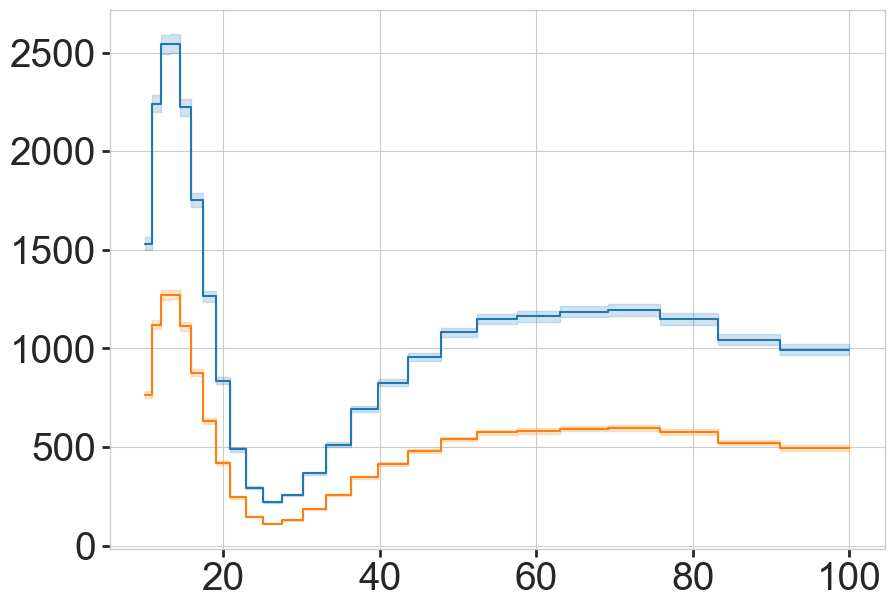

In [9]:
fig, ax = plt.subplots()
plot_histogram(h0, ax=ax)
plot_histogram(h0 / 2, ax=ax)

In [10]:
gen.events

,true_energy,true_cos(zen),weights_pre_detector,reco_energy,weights
0,49.715274,-1.0,0.476566,51.770910,0.476566
1,231.918661,-1.0,0.970091,307.556955,0.970091
2,3.789980,-1.0,0.085504,3.469811,0.085504
3,1.521687,-1.0,0.017174,1.532978,0.017174
4,22.932913,-1.0,0.056546,19.935142,0.056546
...,...,...,...,...,...
99995,3.924242,-1.0,0.362239,3.622899,0.362239
99996,11.424481,-1.0,0.838430,12.670633,0.838430
99997,83.047195,-1.0,0.782582,73.339429,0.782582
99998,47.601028,-1.0,0.441045,50.037007,0.441045


In [11]:
gen_2 = generator.Generator(
    int(1e5),
    default_response,
    generator.OscPars(1.2 * default_pars.delta_mqs, default_pars.sinsq_2theta),
)
h2 = gen_2.get_histogram(bin_edges)

Generating events with log10(E / GeV) from a Gaussian with mean 1.3 and wdith 0.5 and cos(zenith) values uniformly sampled between -1.0 and -1.0.


In [12]:
gen_3 = generator.Generator(
    int(1e5), generator.Response(1.2 * default_response.mu, default_response.sigma), default_pars
)
h3 = gen_3.get_histogram(bin_edges)

Generating events with log10(E / GeV) from a Gaussian with mean 1.3 and wdith 0.5 and cos(zenith) values uniformly sampled between -1.0 and -1.0.


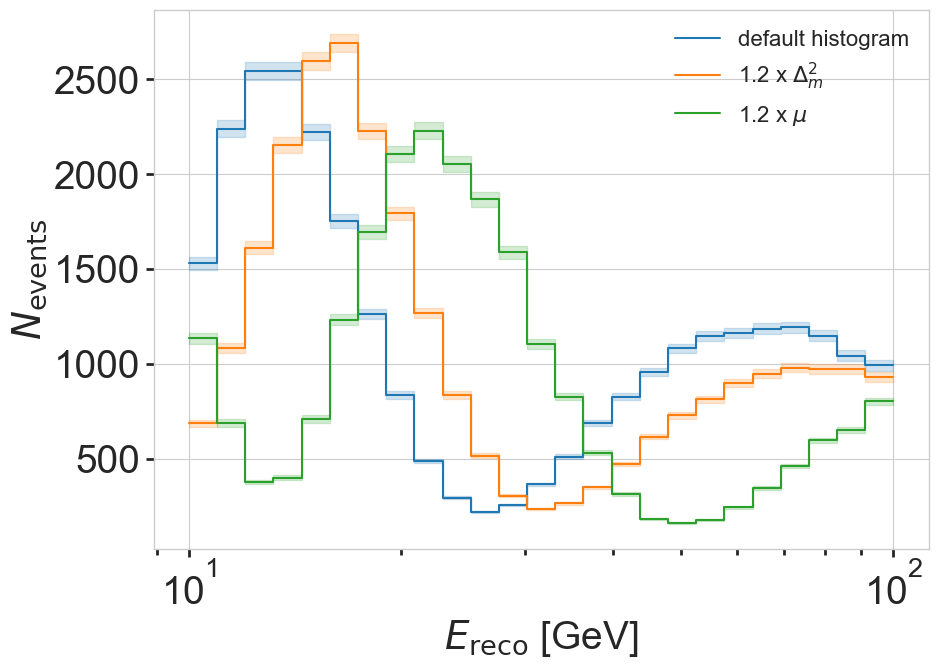

In [13]:
from toy_mc.histogram import plot_histogram

fig, ax = plt.subplots()

plot_histogram(h0, ax=ax, label=r'default histogram')

plot_histogram(h2, ax=ax, label=r'1.2 x $\Delta_m^2$ ')

plot_histogram(h3, ax=ax, label=r'1.2 x $\mu$')


plt.xscale('log')
plt.xlabel(r'$E_{\rm reco}$ [GeV]')
plt.ylabel(r'$N_{\rm events}$')

plt.legend()

In [14]:
from sklearn import preprocessing
from sklearn.compose import make_column_transformer

In [15]:
from surfaces import calculate_knn_probs as knn_probs

In [16]:
reload(generator)
gen_nominal = generator.Generator(
    int(1e5), default_response, default_pars, name="nominal"
)
# It looks like there is a breakdown point where, if the response is *too* different,
# the whole thing doesn't work anymore.
gen_sys_1 = generator.Generator(
    int(1e5),
    generator.Response(1.05 * default_response.mu, default_response.sigma),
    default_pars,
    name="sys_01",
)
gen_sys_2 = generator.Generator(
    int(1e5),
    generator.Response(0.95 * default_response.mu, default_response.sigma),
    default_pars,
    name="sys_02",
)

Generating events with log10(E / GeV) from a Gaussian with mean 1.3 and wdith 0.5 and cos(zenith) values uniformly sampled between -1.0 and -1.0.
Generating events with log10(E / GeV) from a Gaussian with mean 1.3 and wdith 0.5 and cos(zenith) values uniformly sampled between -1.0 and -1.0.
Generating events with log10(E / GeV) from a Gaussian with mean 1.3 and wdith 0.5 and cos(zenith) values uniformly sampled between -1.0 and -1.0.


In [29]:
reload(knn_probs)
df_with_probs = knn_probs.calculate_knn_probs(
    gen_nominal,
    [gen_sys_1, gen_sys_2],
    variables=["true_energy", "reco_energy"],
    tilt_bias_correction=True,
)

Starting KNN evaluation on 10 chunks of data...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:05<00:00,  1.76it/s]


In [34]:
df_with_probs_no_tilt_corr = knn_probs.calculate_knn_probs(
    gen_nominal,
    [gen_sys_1, gen_sys_2],
    variables=["true_energy", "reco_energy"],
    tilt_bias_correction=False,
)

Starting KNN evaluation on 10 chunks of data...


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:03<00:00,  2.95it/s]


In [30]:
df_with_probs

,true_energy,true_cos(zen),weights_pre_detector,reco_energy,weights,set,prob_nominal,prob_sys_01,prob_sys_02
0,81.471201,-1.0,0.774805,57.682182,0.774805,nominal,0.299913,0.014313,0.685774
1,38.219229,-1.0,0.248630,34.989601,0.248630,nominal,0.390495,0.197156,0.412348
2,23.550015,-1.0,0.040551,23.956949,0.040551,nominal,0.426953,0.310050,0.262997
3,11.304173,-1.0,0.809910,9.393689,0.809910,nominal,0.250184,0.017736,0.732080
4,37.588431,-1.0,0.233900,35.370020,0.233900,nominal,0.431365,0.228539,0.340096
...,...,...,...,...,...,...,...,...,...
99995,67.041176,-1.0,0.680605,69.166827,0.680605,nominal,0.485550,0.307192,0.207258
99996,6.294435,-1.0,0.969705,6.423261,0.969705,nominal,0.474446,0.321270,0.204284
99997,16.252714,-1.0,0.649509,15.103980,0.649509,nominal,0.448225,0.168669,0.383107
99998,24.122537,-1.0,0.029790,21.117139,0.029790,nominal,0.367715,0.104419,0.527865


In [31]:
from toy_mc.histogram import Histogram

In [35]:
weighted_hist = Histogram(bin_edges)
weighted_hist.fill(
    df_with_probs["reco_energy"],
    df_with_probs["weights"]
    * df_with_probs["prob_sys_01"]
    / df_with_probs["prob_nominal"],
)

weighted_hist_no_tilt_corr = Histogram(bin_edges)
weighted_hist_no_tilt_corr.fill(
    df_with_probs_no_tilt_corr["reco_energy"],
    df_with_probs_no_tilt_corr["weights"]
    * df_with_probs_no_tilt_corr["prob_sys_01"]
    / df_with_probs_no_tilt_corr["prob_nominal"],
)

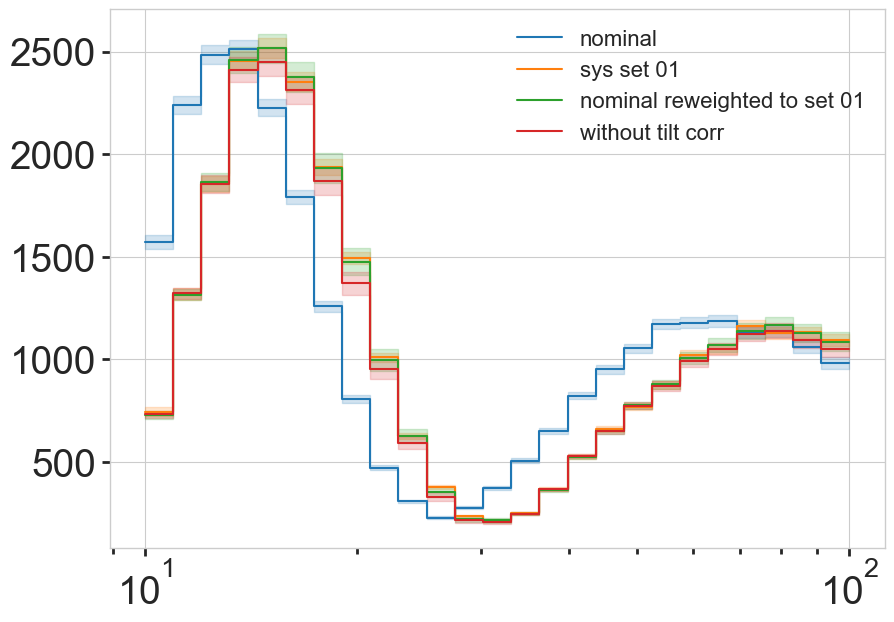

In [36]:
from toy_mc.histogram import plot_histogram

fig, ax = plt.subplots()
plot_histogram(gen_nominal.get_histogram(bin_edges), ax=ax, label="nominal")
plot_histogram(gen_sys_1.get_histogram(bin_edges), ax=ax, label="sys set 01")
plot_histogram(weighted_hist, ax=ax, label="nominal reweighted to set 01")
plot_histogram(weighted_hist_no_tilt_corr, ax=ax, label="without tilt corr")
plt.semilogx()
plt.legend()
plt.show()